# Data preparation

## Getting The Data

In [1]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [2]:
%cp "/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/Data/new_FND_corpus_full_data.xlsx" "/content"

In [3]:
import pandas as pd
pd.set_option('max_colwidth', 200)

data_df = pd.read_excel('/content/new_FND_corpus_full_data.xlsx')
data_df = data_df.drop(columns=['Url'])
data_df = data_df[data_df['Label'] != 'Undetermined']
# data_df = data_df.drop(data_df.loc[data_df['Label'] == 'Undetermined'].index)
data_df = pd.DataFrame({'Content': data_df['Title'].str.cat(data_df['Maintext'], sep='. '), 'Label': data_df['Label']})
data_df

,Content,Label
0,"SAU BẮT CÓC, ĐẾN TRỤC XUẤT (Hà Minh Thảo). Đừng nghe những gì chánh trị gia các nước giàu hứa một\ncách nhân đạo chỉ ký thương ước với các quốc gia tôn trọng nhân quyền, nhưng\nhãy nhìn những gì c...",False
1,DÂM TẶC VIỆN PHÓ LÀ ĐẦU SAI CỦA VŨ NHÔM (tổng hợp). Tên anh ta giờ đã tràn ngập trên báo trên mạng. Tôi\nkhông gọi tên anh ta và không đưa hình anh ta lên đây vì thấy buồn nôn. Là một\nngười từng ...,False
2,"NĂM KỶ HỢI : CẦN DUNG DƯỠNG SỰ TỰ CHỦ CỦA DÂN TỘC (Nguyễn Hiền - VNTB). V * Việt Nam chính thức bước vào năm Kỷ Hợi, năm theo cách tính âm lịch của người\nViệt. Cách đây 1080 năm về trước, vào năm...",False
3,"Lật Chiến Thư chỉ thị cho Nguyễn Thị Kim Ngân về cam kết “Vành đai và Con đường”. Tại đây bà Ngân đã chân thành bày tỏ Và xu nịnh hoàng đế họ Tập, người có thể sắp xếp để Kim Ngân leo lên làm tân ...",False
4,"Màu Cờ: Linh hồn của Tổ Quốc. Bảo Giang () - Sự tự do, nhân phẩm, nhân quyền của người công dân được luật pháp bảo vệ và tôn trọng. Một người công dân không thể bị coi là có tội cho đến khi bị toà...",False
...,...,...
1294,"Kiên Giang: Miễn nhiệm đại biểu HĐND đối với ông Hà Văn Phúc vì bị cáo buộc tham nhũng. Ông Hà Văn Phúc, nguyên Giám đốc Sở Y tế Kiên Giang, đã bị miễn nhiệm đại biểu HĐND tỉnh Kiên Giang tại kỳ h...",True-w-false
1295,"Việt Nam tặng Lào món quà một triệu USD để mua lòng. Trong chuyến thăm chính thức Lào ngày 10-11/4/2023, Chủ tịch nước Võ Văn Thưởng đã tặng Lào món quà trị giá một triệu USD, nhằm củng cố quan hệ...",True-w-false
1296,"Bốc thăm chọn 30 người ở Bộ Tư pháp phải xác minh tài sản, thu nhập. (Dân trí) - Sáng nay (14/7), Bộ Tư pháp đã tổ chức bốc thăm chọn 30 người phải xác minh tài sản, thu nhập theo quy định của Luậ...",True-w-false
1297,Thủ tướng Giorgia Meloni đón trang trọng Chủ tịch nước Võ Văn Thưởng.. Hai bên đã trao đổi toàn diện về hợp tác và thống nhất biện pháp thực chất nhằm tăng cường quan hệ hai nước. Thủ tướng Giorgi...,True-w-false


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1298
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  1217 non-null   object
 1   Label    1217 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


In [5]:
data_df['Label'].value_counts()

True            342
True-w-false    294
False-w-true    292
False           289
Name: Label, dtype: int64

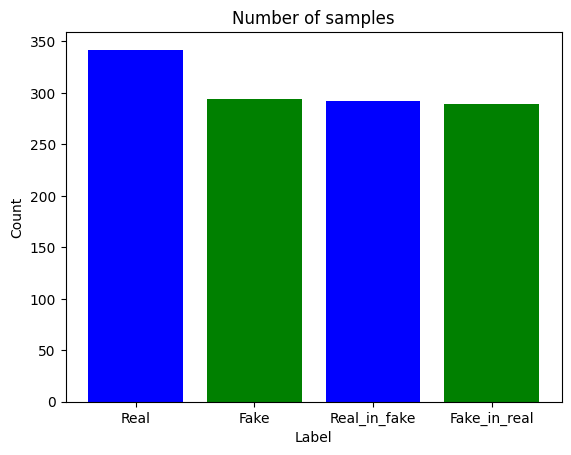

In [6]:
import matplotlib.pyplot as plt

# Đếm số lượng mẫu theo giá trị của cột 'label'
label_counts = data_df['Label'].value_counts()

# Vẽ biểu đồ cột
plt.bar(label_counts.index, label_counts.values, tick_label=['Real', 'Fake', 'Real_in_fake', 'Fake_in_real'], color=['blue', 'green'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of samples')
plt.show()

## Cleaning The Data

In [7]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in round  brackets, remove new line character, remove punctuation and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'[·–‘’“”…]', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text.strip()

round1 = lambda x: clean_text_round1(x)

In [8]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Content': data_df['Content'].apply(round1), 'Label': data_df['Label']})
data_clean

,Content,Label
0,sau bắt cóc đến trục xuất đừng nghe những gì chánh trị gia các nước giàu hứa một cách nhân đạo chỉ ký thương ước với các quốc gia tôn trọng nhân quyền nhưng hãy nhìn những gì chúng làm đối với đồn...,False
1,dâm tặc viện phó là đầu sai của vũ nhôm tên anh ta giờ đã tràn ngập trên báo trên mạng tôi không gọi tên anh ta và không đưa hình anh ta lên đây vì thấy buồn nôn là một người từng rất có quyền thế...,False
2,năm kỷ hợi cần dung dưỡng sự tự chủ của dân tộc v việt nam chính thức bước vào năm kỷ hợi năm theo cách tính âm lịch của người việt cách đây năm về trước vào năm ngô tiên vương đã đánh đuổi tan gi...,False
3,lật chiến thư chỉ thị cho nguyễn thị kim ngân về cam kết vành đai và con đường tại đây bà ngân đã chân thành bày tỏ và xu nịnh hoàng đế họ tập người có thể sắp xếp để kim ngân leo lên làm tân thái...,False
4,màu cờ linh hồn của tổ quốc bảo giang sự tự do nhân phẩm nhân quyền của người công dân được luật pháp bảo vệ và tôn trọng một người công dân không thể bị coi là có tội cho đến khi bị toà tuyên án ...,False
...,...,...
1294,kiên giang miễn nhiệm đại biểu hđnd đối với ông hà văn phúc vì bị cáo buộc tham nhũng ông hà văn phúc nguyên giám đốc sở y tế kiên giang đã bị miễn nhiệm đại biểu hđnd tỉnh kiên giang tại kỳ họp t...,True-w-false
1295,việt nam tặng lào món quà một triệu usd để mua lòng trong chuyến thăm chính thức lào ngày chủ tịch nước võ văn thưởng đã tặng lào món quà trị giá một triệu usd nhằm củng cố quan hệ hữu nghị vĩ đại...,True-w-false
1296,bốc thăm chọn người ở bộ tư pháp phải xác minh tài sản thu nhập sáng nay bộ tư pháp đã tổ chức bốc thăm chọn người phải xác minh tài sản thu nhập theo quy định của luật phòng chống tham nhũng đây ...,True-w-false
1297,thủ tướng giorgia meloni đón trang trọng chủ tịch nước võ văn thưởng hai bên đã trao đổi toàn diện về hợp tác và thống nhất biện pháp thực chất nhằm tăng cường quan hệ hai nước thủ tướng giorgia m...,True-w-false


In [9]:
import re

def clean_text_round2(text):
    '''Remove imojis'''
    # Mẫu regex để khớp với các emoji dựa trên các mã Unicode
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001FAA0-\U0001FAAF"  # Symbols for Legacy Computing
                           u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F170-\U0001F251"  # Enclosed Alphanumeric Supplement
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))

round2 = lambda x: clean_text_round2(x)

In [10]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Content': data_clean['Content'].apply(round2), 'Label': data_clean['Label']})
data_clean

,Content,Label
0,sau bắt cóc đến trục xuất đừng nghe những gì chánh trị gia các nước giàu hứa một cách nhân đạo chỉ ký thương ước với các quốc gia tôn trọng nhân quyền nhưng hãy nhìn những gì chúng làm đối với đồn...,False
1,dâm tặc viện phó là đầu sai của vũ nhôm tên anh ta giờ đã tràn ngập trên báo trên mạng tôi không gọi tên anh ta và không đưa hình anh ta lên đây vì thấy buồn nôn là một người từng rất có quyền thế...,False
2,năm kỷ hợi cần dung dưỡng sự tự chủ của dân tộc v việt nam chính thức bước vào năm kỷ hợi năm theo cách tính âm lịch của người việt cách đây năm về trước vào năm ngô tiên vương đã đánh đuổi tan gi...,False
3,lật chiến thư chỉ thị cho nguyễn thị kim ngân về cam kết vành đai và con đường tại đây bà ngân đã chân thành bày tỏ và xu nịnh hoàng đế họ tập người có thể sắp xếp để kim ngân leo lên làm tân thái...,False
4,màu cờ linh hồn của tổ quốc bảo giang sự tự do nhân phẩm nhân quyền của người công dân được luật pháp bảo vệ và tôn trọng một người công dân không thể bị coi là có tội cho đến khi bị toà tuyên án ...,False
...,...,...
1294,kiên giang miễn nhiệm đại biểu hđnd đối với ông hà văn phúc vì bị cáo buộc tham nhũng ông hà văn phúc nguyên giám đốc sở y tế kiên giang đã bị miễn nhiệm đại biểu hđnd tỉnh kiên giang tại kỳ họp t...,True-w-false
1295,việt nam tặng lào món quà một triệu usd để mua lòng trong chuyến thăm chính thức lào ngày chủ tịch nước võ văn thưởng đã tặng lào món quà trị giá một triệu usd nhằm củng cố quan hệ hữu nghị vĩ đại...,True-w-false
1296,bốc thăm chọn người ở bộ tư pháp phải xác minh tài sản thu nhập sáng nay bộ tư pháp đã tổ chức bốc thăm chọn người phải xác minh tài sản thu nhập theo quy định của luật phòng chống tham nhũng đây ...,True-w-false
1297,thủ tướng giorgia meloni đón trang trọng chủ tịch nước võ văn thưởng hai bên đã trao đổi toàn diện về hợp tác và thống nhất biện pháp thực chất nhằm tăng cường quan hệ hai nước thủ tướng giorgia m...,True-w-false


In [11]:
import re

def clean_text_round3(text):
    '''Remove chinese chracters'''
    text = re.sub(r'[\u4e00-\u9fff]', '', text)
    return text

round3 = lambda x: clean_text_round3(x)

In [12]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Content': data_clean['Content'].apply(round3), 'Label': data_clean['Label']})
data_clean

,Content,Label
0,sau bắt cóc đến trục xuất đừng nghe những gì chánh trị gia các nước giàu hứa một cách nhân đạo chỉ ký thương ước với các quốc gia tôn trọng nhân quyền nhưng hãy nhìn những gì chúng làm đối với đồn...,False
1,dâm tặc viện phó là đầu sai của vũ nhôm tên anh ta giờ đã tràn ngập trên báo trên mạng tôi không gọi tên anh ta và không đưa hình anh ta lên đây vì thấy buồn nôn là một người từng rất có quyền thế...,False
2,năm kỷ hợi cần dung dưỡng sự tự chủ của dân tộc v việt nam chính thức bước vào năm kỷ hợi năm theo cách tính âm lịch của người việt cách đây năm về trước vào năm ngô tiên vương đã đánh đuổi tan gi...,False
3,lật chiến thư chỉ thị cho nguyễn thị kim ngân về cam kết vành đai và con đường tại đây bà ngân đã chân thành bày tỏ và xu nịnh hoàng đế họ tập người có thể sắp xếp để kim ngân leo lên làm tân thái...,False
4,màu cờ linh hồn của tổ quốc bảo giang sự tự do nhân phẩm nhân quyền của người công dân được luật pháp bảo vệ và tôn trọng một người công dân không thể bị coi là có tội cho đến khi bị toà tuyên án ...,False
...,...,...
1294,kiên giang miễn nhiệm đại biểu hđnd đối với ông hà văn phúc vì bị cáo buộc tham nhũng ông hà văn phúc nguyên giám đốc sở y tế kiên giang đã bị miễn nhiệm đại biểu hđnd tỉnh kiên giang tại kỳ họp t...,True-w-false
1295,việt nam tặng lào món quà một triệu usd để mua lòng trong chuyến thăm chính thức lào ngày chủ tịch nước võ văn thưởng đã tặng lào món quà trị giá một triệu usd nhằm củng cố quan hệ hữu nghị vĩ đại...,True-w-false
1296,bốc thăm chọn người ở bộ tư pháp phải xác minh tài sản thu nhập sáng nay bộ tư pháp đã tổ chức bốc thăm chọn người phải xác minh tài sản thu nhập theo quy định của luật phòng chống tham nhũng đây ...,True-w-false
1297,thủ tướng giorgia meloni đón trang trọng chủ tịch nước võ văn thưởng hai bên đã trao đổi toàn diện về hợp tác và thống nhất biện pháp thực chất nhằm tăng cường quan hệ hai nước thủ tướng giorgia m...,True-w-false


In [13]:
import re

def clean_text_round4(text):
    '''remove links'''
    # Define a regular expression pattern for matching links
    link_pattern = re.compile(r'https?://\S+|www\.\S+')

    # Use sub to replace links with an empty string
    cleaned_text = re.sub(link_pattern, '', text)

    return cleaned_text

round4 = lambda x: clean_text_round4(x)

In [14]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Content': data_clean['Content'].apply(round4), 'Label': data_clean['Label']})
data_clean

,Content,Label
0,sau bắt cóc đến trục xuất đừng nghe những gì chánh trị gia các nước giàu hứa một cách nhân đạo chỉ ký thương ước với các quốc gia tôn trọng nhân quyền nhưng hãy nhìn những gì chúng làm đối với đồn...,False
1,dâm tặc viện phó là đầu sai của vũ nhôm tên anh ta giờ đã tràn ngập trên báo trên mạng tôi không gọi tên anh ta và không đưa hình anh ta lên đây vì thấy buồn nôn là một người từng rất có quyền thế...,False
2,năm kỷ hợi cần dung dưỡng sự tự chủ của dân tộc v việt nam chính thức bước vào năm kỷ hợi năm theo cách tính âm lịch của người việt cách đây năm về trước vào năm ngô tiên vương đã đánh đuổi tan gi...,False
3,lật chiến thư chỉ thị cho nguyễn thị kim ngân về cam kết vành đai và con đường tại đây bà ngân đã chân thành bày tỏ và xu nịnh hoàng đế họ tập người có thể sắp xếp để kim ngân leo lên làm tân thái...,False
4,màu cờ linh hồn của tổ quốc bảo giang sự tự do nhân phẩm nhân quyền của người công dân được luật pháp bảo vệ và tôn trọng một người công dân không thể bị coi là có tội cho đến khi bị toà tuyên án ...,False
...,...,...
1294,kiên giang miễn nhiệm đại biểu hđnd đối với ông hà văn phúc vì bị cáo buộc tham nhũng ông hà văn phúc nguyên giám đốc sở y tế kiên giang đã bị miễn nhiệm đại biểu hđnd tỉnh kiên giang tại kỳ họp t...,True-w-false
1295,việt nam tặng lào món quà một triệu usd để mua lòng trong chuyến thăm chính thức lào ngày chủ tịch nước võ văn thưởng đã tặng lào món quà trị giá một triệu usd nhằm củng cố quan hệ hữu nghị vĩ đại...,True-w-false
1296,bốc thăm chọn người ở bộ tư pháp phải xác minh tài sản thu nhập sáng nay bộ tư pháp đã tổ chức bốc thăm chọn người phải xác minh tài sản thu nhập theo quy định của luật phòng chống tham nhũng đây ...,True-w-false
1297,thủ tướng giorgia meloni đón trang trọng chủ tịch nước võ văn thưởng hai bên đã trao đổi toàn diện về hợp tác và thống nhất biện pháp thực chất nhằm tăng cường quan hệ hai nước thủ tướng giorgia m...,True-w-false


### pyvi

In [ ]:
# !pip install pyvi

In [ ]:
# from pyvi import ViTokenizer

# round5 = lambda x: ViTokenizer.tokenize(str(x))

# # Let's take a look at the updated text
# data_clean = pd.DataFrame({'Content': data_clean['Content'].apply(round5), 'Label': data_clean['Label']})
# data_clean

### py_vncorenlp

In [15]:
!pip install py_vncorenlp
!mkdir vncorenlp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.0 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4307 sha256=75f3560d5b2ea6b190b3e3343859f44e4901636fb1d3361de4d179e98ea4381d
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [16]:
import py_vncorenlp

# Automatically download VnCoreNLP components from the original repository
# and save them in some local machine folder
py_vncorenlp.download_model(save_dir='/content/vncorenlp')

# Load the word and sentence segmentation component
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/vncorenlp')

def clean_text_round5(text):
    '''Word segmentation'''
    result = rdrsegmenter.word_segment(str(text))
    if len(result) > 0:
        return result[0]
    else:
        return ''
round5 = lambda x: clean_text_round5(x)

In [17]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Content': data_clean['Content'].apply(round5), 'Label': data_clean['Label']})
data_clean

,Content,Label
0,sau bắt_cóc đến trục_xuất đừng nghe những gì chánh_trị_gia các nước giàu hứa một_cách nhân_đạo chỉ ký thương_ước với các quốc_gia tôn_trọng nhân_quyền nhưng hãy nhìn những gì chúng làm đối_với đồn...,False
1,dâm tặc viện phó là đầu_sai của vũ nhôm tên anh ta giờ đã tràn_ngập trên báo trên mạng tôi không gọi tên anh ta và không đưa hình anh ta lên đây vì thấy buồn_nôn là một người từng rất có quyền_thế...,False
2,năm kỷ hợi cần dung_dưỡng sự tự_chủ của dân_tộc v việt_nam chính_thức bước vào năm kỷ hợi năm theo cách tính âm_lịch của người việt cách đây năm về trước vào năm ngô tiên_vương đã đánh_đuổi tan gi...,False
3,lật chiến thư chỉ_thị cho nguyễn thị kim_ngân về cam_kết vành_đai và con đường tại đây bà ngân đã chân_thành bày_tỏ và xu_nịnh hoàng_đế họ tập người có_thể sắp_xếp để kim_ngân leo lên làm tân_thái...,False
4,màu cờ linh_hồn của tổ_quốc bảo giang sự tự_do nhân_phẩm nhân_quyền của người công_dân được luật_pháp bảo_vệ và tôn_trọng một người công_dân không_thể bị coi là có tội cho đến khi bị toà tuyên_án ...,False
...,...,...
1294,kiên_giang miễn_nhiệm đại_biểu hđnd đối_với ông hà văn phúc vì bị_cáo buộc tham_nhũng ông hà văn phúc nguyên giám_đốc sở y_tế kiên_giang đã bị miễn_nhiệm đại_biểu hđnd tỉnh kiên_giang tại kỳ họp t...,True-w-false
1295,việt_nam tặng lào món quà một_triệu usd để mua lòng trong chuyến thăm chính_thức lào ngày chủ_tịch nước võ văn thưởng đã tặng lào món quà trị_giá một_triệu usd nhằm củng_cố quan_hệ hữu_nghị vĩ_đại...,True-w-false
1296,bốc_thăm chọn người ở bộ tư_pháp phải xác_minh tài_sản thu_nhập sáng nay bộ tư_pháp đã tổ_chức bốc_thăm chọn người phải xác_minh tài_sản thu_nhập theo quy_định của luật phòng_chống tham_nhũng đây ...,True-w-false
1297,thủ_tướng giorgia meloni đón trang_trọng chủ_tịch nước võ văn thưởng hai bên đã trao_đổi toàn_diện về hợp_tác và thống_nhất biện_pháp thực_chất nhằm tăng_cường quan_hệ hai nước thủ_tướng giorgia m...,True-w-false


In [18]:
%cd /content
!wget https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt

/content
--2023-12-04 01:17:27--  https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20475 (20K) [text/plain]
Saving to: ‘vietnamese-stopwords-dash.txt’

vietnamese-stopword 100%[===================>]  20.00K  --.-KB/s    in 0.001s  

2023-12-04 01:17:27 (15.3 MB/s) - ‘vietnamese-stopwords-dash.txt’ saved [20475/20475]



In [39]:
add_stop_words = ['đi', 'ta', 'hai', 'hàng', 'đầu']

In [40]:
import re

# List of stop words
stop_words = list()
with open('/content/vietnamese-stopwords-dash.txt', 'r') as file:
    lines = file.readlines()
    stop_words = [line.strip() for line in lines]
stop_words.extend(add_stop_words)

def clean_text_round6(text):
    '''Remove stop words'''
    # Create a regex pattern to match stop words
    pattern = r'\b(?:' + '|'.join(map(re.escape, stop_words)) + r')\b'
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

round6 = lambda x: clean_text_round6(x)

In [41]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Content': data_clean['Content'].apply(round6), 'Label': data_clean['Label']})
data_clean

,Content,Label
0,bắt_cóc trục_xuất đừng chánh_trị_gia giàu hứa nhân_đạo ký thương_ước quốc_gia tôn_trọng nhân_quyền đồng_bào trường_hợp nguyễn_quang hồng nhân trịnh thuý hạnh nhà_nước cộng_hoà liên_bang đức bắt ch...,False
1,dâm tặc viện phó đầu_sai vũ nhôm tràn_ngập báo mạng gọi hình buồn_nôn quyền_thế dâm tặc hưu địa_phương ngang_nhiên trò dâm_ô đồi_bại trẻ_em tưởng_tượng đương_chức trò đồi_bại làm_việc sinh_sống xả...,False
2,kỷ hợi dung_dưỡng tự_chủ dân_tộc v việt_nam chính_thức kỷ hợi âm_lịch việt ngô tiên_vương đánh_đuổi tan giặc nam hán nhà_nước việt_nam độc_lập chủ độc_lập tự_chủ xưng_vương kinh_đô cổ loa phong ch...,False
3,lật chiến thư chỉ_thị nguyễn thị kim_ngân cam_kết vành_đai đường ngân chân_thành bày_tỏ xu_nịnh hoàng_đế tập sắp_xếp kim_ngân leo tân_thái_thú hồn hoa xác việt tương_lai câu kinh_kệ quen_thuộc kế_...,False
4,màu cờ linh_hồn tổ_quốc bảo giang tự_do nhân_phẩm nhân_quyền công_dân luật_pháp bảo_vệ tôn_trọng công_dân coi tội tuyên_án bạo_hành cơ_quan trách_nhiệm xã_hội nhân_bản tiếng súng đùng chát phá làn...,False
...,...,...
1294,kiên_giang miễn_nhiệm đại_biểu hđnd hà văn phúc bị_cáo buộc tham_nhũng hà văn phúc nguyên giám_đốc sở y_tế kiên_giang miễn_nhiệm đại_biểu hđnd tỉnh kiên_giang kỳ họp hậu_quả sai_phạm nghiêm_trọng ...,True-w-false
1295,việt_nam tặng lào món quà một_triệu usd mua chuyến thăm chính_thức lào chủ_tịch võ văn thưởng tặng lào món quà trị_giá một_triệu usd củng_cố quan_hệ hữu_nghị vĩ_đại đoàn_kết hợp_tác toàn_diện việt...,True-w-false
1296,bốc_thăm tư_pháp xác_minh tài_sản thu_nhập tư_pháp tổ_chức bốc_thăm xác_minh tài_sản thu_nhập quy_định luật phòng_chống tham_nhũng hoạt_động thường_niên tư_pháp tăng_cường minh_bạch trách_nhiệm ch...,True-w-false
1297,thủ_tướng giorgia meloni đón trang_trọng chủ_tịch võ văn thưởng trao_đổi toàn_diện hợp_tác thống_nhất biện_pháp thực_chất tăng_cường quan_hệ thủ_tướng giorgia meloni tiềm_năng mở_rộng hợp_tác quyế...,True-w-false


In [57]:
import re

def clean_text_round7(text):
    '''remove name'''
    text = re.sub(r'phạm[_\s]*minh[_\s]*chính', '', text)
    text = re.sub(r'nguyễn[_\s]*phú[_\s]*trọng', '', text)
    text = re.sub(r'nguyễn[_\s]*xuân[_\s]*phúc', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

round7 = lambda x: clean_text_round7(x)

In [58]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Content': data_clean['Content'].apply(round7), 'Label': data_clean['Label']})
data_clean

,Content,Label
0,bắt_cóc trục_xuất đừng chánh_trị_gia giàu hứa nhân_đạo ký thương_ước quốc_gia tôn_trọng nhân_quyền đồng_bào trường_hợp nguyễn_quang hồng nhân trịnh thuý hạnh nhà_nước cộng_hoà liên_bang đức bắt ch...,False
1,dâm tặc viện phó đầu_sai vũ nhôm tràn_ngập báo mạng gọi hình buồn_nôn quyền_thế dâm tặc hưu địa_phương ngang_nhiên trò dâm_ô đồi_bại trẻ_em tưởng_tượng đương_chức trò đồi_bại làm_việc sinh_sống xả...,False
2,kỷ hợi dung_dưỡng tự_chủ dân_tộc v việt_nam chính_thức kỷ hợi âm_lịch việt ngô tiên_vương đánh_đuổi tan giặc nam hán nhà_nước việt_nam độc_lập chủ độc_lập tự_chủ xưng_vương kinh_đô cổ loa phong ch...,False
3,lật chiến thư chỉ_thị nguyễn thị kim_ngân cam_kết vành_đai đường ngân chân_thành bày_tỏ xu_nịnh hoàng_đế tập sắp_xếp kim_ngân leo tân_thái_thú hồn hoa xác việt tương_lai câu kinh_kệ quen_thuộc kế_...,False
4,màu cờ linh_hồn tổ_quốc bảo giang tự_do nhân_phẩm nhân_quyền công_dân luật_pháp bảo_vệ tôn_trọng công_dân coi tội tuyên_án bạo_hành cơ_quan trách_nhiệm xã_hội nhân_bản tiếng súng đùng chát phá làn...,False
...,...,...
1294,kiên_giang miễn_nhiệm đại_biểu hđnd hà văn phúc bị_cáo buộc tham_nhũng hà văn phúc nguyên giám_đốc sở y_tế kiên_giang miễn_nhiệm đại_biểu hđnd tỉnh kiên_giang kỳ họp hậu_quả sai_phạm nghiêm_trọng ...,True-w-false
1295,việt_nam tặng lào món quà một_triệu usd mua chuyến thăm chính_thức lào chủ_tịch võ văn thưởng tặng lào món quà trị_giá một_triệu usd củng_cố quan_hệ hữu_nghị vĩ_đại đoàn_kết hợp_tác toàn_diện việt...,True-w-false
1296,bốc_thăm tư_pháp xác_minh tài_sản thu_nhập tư_pháp tổ_chức bốc_thăm xác_minh tài_sản thu_nhập quy_định luật phòng_chống tham_nhũng hoạt_động thường_niên tư_pháp tăng_cường minh_bạch trách_nhiệm ch...,True-w-false
1297,thủ_tướng giorgia meloni đón trang_trọng chủ_tịch võ văn thưởng trao_đổi toàn_diện hợp_tác thống_nhất biện_pháp thực_chất tăng_cường quan_hệ thủ_tướng giorgia meloni tiềm_năng mở_rộng hợp_tác quyế...,True-w-false


In [77]:
import re

# List of stop words
add_stop_words = ['phạm', 'minh', 'trọng']

def clean_text_round8(text):
    '''Remove stop words'''
    # Create a regex pattern to match stop words
    pattern = r'\b(?:' + '|'.join(map(re.escape, add_stop_words)) + r')\b'
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

round8 = lambda x: clean_text_round8(x)

In [78]:
# Let's take a look at the updated text
data_clean = pd.DataFrame({'Content': data_clean['Content'].apply(round8), 'Label': data_clean['Label']})
data_clean

,Content,Label
0,bắt_cóc trục_xuất đừng chánh_trị_gia giàu hứa nhân_đạo ký thương_ước quốc_gia tôn_trọng nhân_quyền đồng_bào trường_hợp nguyễn_quang hồng nhân trịnh thuý hạnh nhà_nước cộng_hoà liên_bang đức bắt ch...,False
1,dâm tặc viện phó đầu_sai vũ nhôm tràn_ngập báo mạng gọi hình buồn_nôn quyền_thế dâm tặc hưu địa_phương ngang_nhiên trò dâm_ô đồi_bại trẻ_em tưởng_tượng đương_chức trò đồi_bại làm_việc sinh_sống xả...,False
2,kỷ hợi dung_dưỡng tự_chủ dân_tộc v việt_nam chính_thức kỷ hợi âm_lịch việt ngô tiên_vương đánh_đuổi tan giặc nam hán nhà_nước việt_nam độc_lập chủ độc_lập tự_chủ xưng_vương kinh_đô cổ loa phong ch...,False
3,lật chiến thư chỉ_thị nguyễn thị kim_ngân cam_kết vành_đai đường ngân chân_thành bày_tỏ xu_nịnh hoàng_đế tập sắp_xếp kim_ngân leo tân_thái_thú hồn hoa xác việt tương_lai câu kinh_kệ quen_thuộc kế_...,False
4,màu cờ linh_hồn tổ_quốc bảo giang tự_do nhân_phẩm nhân_quyền công_dân luật_pháp bảo_vệ tôn_trọng công_dân coi tội tuyên_án bạo_hành cơ_quan trách_nhiệm xã_hội nhân_bản tiếng súng đùng chát phá làn...,False
...,...,...
1294,kiên_giang miễn_nhiệm đại_biểu hđnd hà văn phúc bị_cáo buộc tham_nhũng hà văn phúc nguyên giám_đốc sở y_tế kiên_giang miễn_nhiệm đại_biểu hđnd tỉnh kiên_giang kỳ họp hậu_quả sai_phạm nghiêm_trọng ...,True-w-false
1295,việt_nam tặng lào món quà một_triệu usd mua chuyến thăm chính_thức lào chủ_tịch võ văn thưởng tặng lào món quà trị_giá một_triệu usd củng_cố quan_hệ hữu_nghị vĩ_đại đoàn_kết hợp_tác toàn_diện việt...,True-w-false
1296,bốc_thăm tư_pháp xác_minh tài_sản thu_nhập tư_pháp tổ_chức bốc_thăm xác_minh tài_sản thu_nhập quy_định luật phòng_chống tham_nhũng hoạt_động thường_niên tư_pháp tăng_cường minh_bạch trách_nhiệm ch...,True-w-false
1297,thủ_tướng giorgia meloni đón trang_trọng chủ_tịch võ văn thưởng trao_đổi toàn_diện hợp_tác thống_nhất biện_pháp thực_chất tăng_cường quan_hệ thủ_tướng giorgia meloni tiềm_năng mở_rộng hợp_tác quyế...,True-w-false


In [79]:
# remove rows whose content is null
data_clean.drop(data_clean[data_clean['Content'] == ''].index, inplace=True)
data_clean

,Content,Label
0,bắt_cóc trục_xuất đừng chánh_trị_gia giàu hứa nhân_đạo ký thương_ước quốc_gia tôn_trọng nhân_quyền đồng_bào trường_hợp nguyễn_quang hồng nhân trịnh thuý hạnh nhà_nước cộng_hoà liên_bang đức bắt ch...,False
1,dâm tặc viện phó đầu_sai vũ nhôm tràn_ngập báo mạng gọi hình buồn_nôn quyền_thế dâm tặc hưu địa_phương ngang_nhiên trò dâm_ô đồi_bại trẻ_em tưởng_tượng đương_chức trò đồi_bại làm_việc sinh_sống xả...,False
2,kỷ hợi dung_dưỡng tự_chủ dân_tộc v việt_nam chính_thức kỷ hợi âm_lịch việt ngô tiên_vương đánh_đuổi tan giặc nam hán nhà_nước việt_nam độc_lập chủ độc_lập tự_chủ xưng_vương kinh_đô cổ loa phong ch...,False
3,lật chiến thư chỉ_thị nguyễn thị kim_ngân cam_kết vành_đai đường ngân chân_thành bày_tỏ xu_nịnh hoàng_đế tập sắp_xếp kim_ngân leo tân_thái_thú hồn hoa xác việt tương_lai câu kinh_kệ quen_thuộc kế_...,False
4,màu cờ linh_hồn tổ_quốc bảo giang tự_do nhân_phẩm nhân_quyền công_dân luật_pháp bảo_vệ tôn_trọng công_dân coi tội tuyên_án bạo_hành cơ_quan trách_nhiệm xã_hội nhân_bản tiếng súng đùng chát phá làn...,False
...,...,...
1294,kiên_giang miễn_nhiệm đại_biểu hđnd hà văn phúc bị_cáo buộc tham_nhũng hà văn phúc nguyên giám_đốc sở y_tế kiên_giang miễn_nhiệm đại_biểu hđnd tỉnh kiên_giang kỳ họp hậu_quả sai_phạm nghiêm_trọng ...,True-w-false
1295,việt_nam tặng lào món quà một_triệu usd mua chuyến thăm chính_thức lào chủ_tịch võ văn thưởng tặng lào món quà trị_giá một_triệu usd củng_cố quan_hệ hữu_nghị vĩ_đại đoàn_kết hợp_tác toàn_diện việt...,True-w-false
1296,bốc_thăm tư_pháp xác_minh tài_sản thu_nhập tư_pháp tổ_chức bốc_thăm xác_minh tài_sản thu_nhập quy_định luật phòng_chống tham_nhũng hoạt_động thường_niên tư_pháp tăng_cường minh_bạch trách_nhiệm ch...,True-w-false
1297,thủ_tướng giorgia meloni đón trang_trọng chủ_tịch võ văn thưởng trao_đổi toàn_diện hợp_tác thống_nhất biện_pháp thực_chất tăng_cường quan_hệ thủ_tướng giorgia meloni tiềm_năng mở_rộng hợp_tác quyế...,True-w-false


## Create document-term matrix (Optional)

In [ ]:
# Create a document-term matrix using CountVectorizer, and exclude common Vietnamese stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(data_clean['Content'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

,_cụ,_giới,_hòa,_họa,_hỏa,_hỏa_thế,_ng,_o,_phát_ngôn,_thiết,...,ứngviệt,ứt,ứu,ứơc,ừa,ừng,ửa,ửng,ựu,ỷ_lại
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Save cleaned data

In [80]:
import pickle

# Let's pickle it for later use
# data_dtm.to_pickle("dtm.pkl")
# pickle.dump(cv, open("cv.pkl", "wb"))
data_clean.to_pickle('/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/Data/data_clean_4_class.pkl')

## Visulization

In [81]:
data_real = data_clean[data_clean['Label'] == "True"]
data_fake = data_clean[data_clean['Label'] == 'False']
data_real_inside_fake = data_clean[data_clean['Label'] == 'False-w-true']
data_fake_inside_real = data_clean[data_clean['Label'] == 'True-w-false']

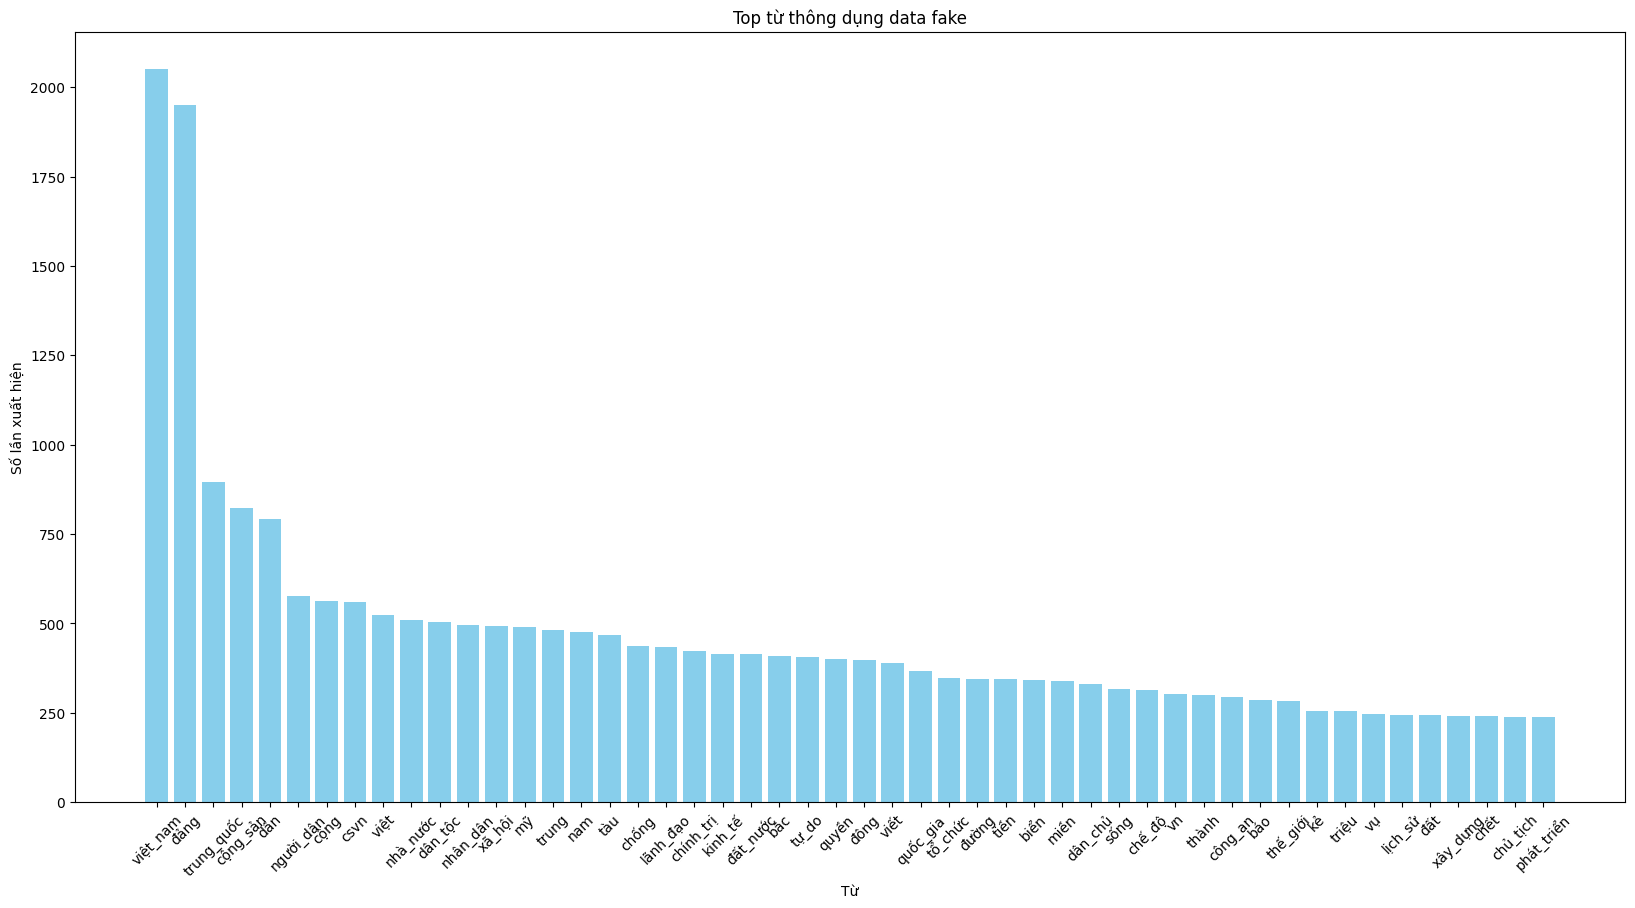

In [82]:
from collections import Counter
import matplotlib.pyplot as plt

word_counts_fake = Counter(' '.join(list(data_fake['Content'])).split(' '))

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_fake.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng data fake')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

In [83]:
top_words

[('việt_nam', 2051),
 ('đảng', 1949),
 ('trung_quốc', 896),
 ('cộng_sản', 823),
 ('dân', 792),
 ('người_dân', 577),
 ('cộng', 564),
 ('csvn', 560),
 ('việt', 524),
 ('nhà_nước', 510),
 ('dân_tộc', 504),
 ('nhân_dân', 497),
 ('xã_hội', 494),
 ('mỹ', 489),
 ('trung', 481),
 ('nam', 477),
 ('tàu', 467),
 ('chống', 436),
 ('lãnh_đạo', 433),
 ('chính_trị', 424),
 ('kinh_tế', 416),
 ('đất_nước', 414),
 ('bắc', 408),
 ('tự_do', 407),
 ('quyền', 400),
 ('đông', 398),
 ('viết', 390),
 ('quốc_gia', 367),
 ('tổ_chức', 348),
 ('đường', 345),
 ('tiền', 345),
 ('biển', 343),
 ('miền', 338),
 ('dân_chủ', 332),
 ('sống', 317),
 ('chế_độ', 315),
 ('vn', 302),
 ('thành', 300),
 ('công_an', 295),
 ('báo', 285),
 ('thế_giới', 282),
 ('kẻ', 256),
 ('triệu', 255),
 ('vụ', 246),
 ('lịch_sử', 245),
 ('đất', 244),
 ('xây_dựng', 241),
 ('chết', 240),
 ('chủ_tịch', 238),
 ('phát_triển', 238)]

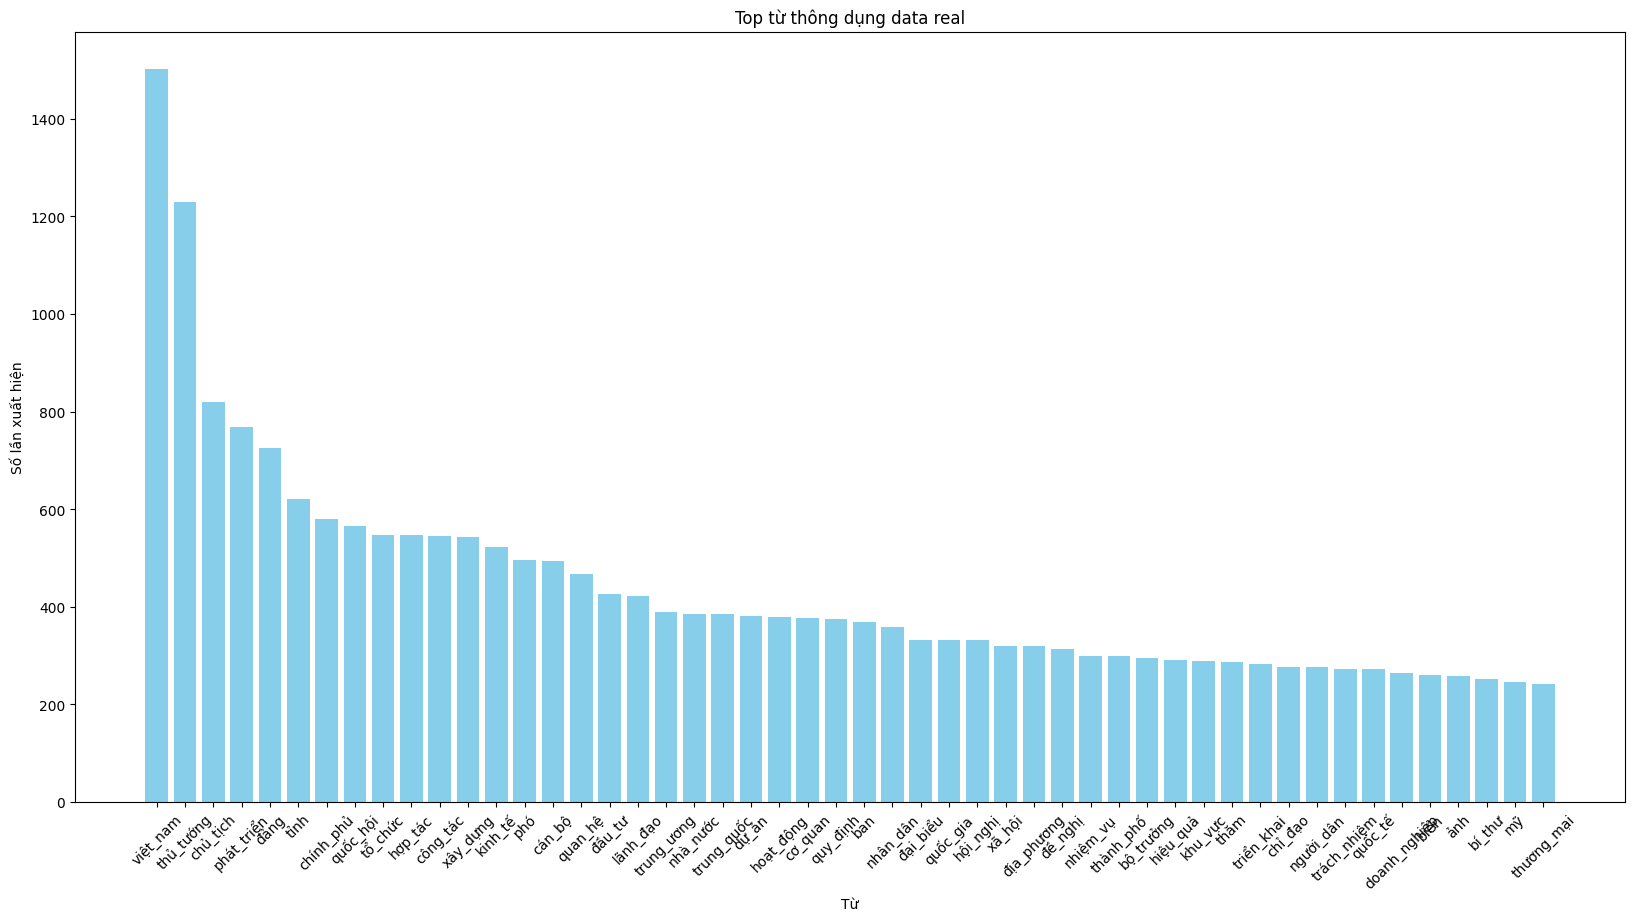

In [84]:
word_counts_real = Counter(' '.join(list(data_real['Content'])).split(' '))

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_real.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng data real')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

In [85]:
top_words

[('việt_nam', 1503),
 ('thủ_tướng', 1230),
 ('chủ_tịch', 820),
 ('phát_triển', 768),
 ('đảng', 726),
 ('tỉnh', 622),
 ('chính_phủ', 579),
 ('quốc_hội', 566),
 ('tổ_chức', 547),
 ('hợp_tác', 547),
 ('công_tác', 545),
 ('xây_dựng', 544),
 ('kinh_tế', 522),
 ('phó', 496),
 ('cán_bộ', 493),
 ('quan_hệ', 467),
 ('đầu_tư', 427),
 ('lãnh_đạo', 422),
 ('trung_ương', 390),
 ('nhà_nước', 386),
 ('trung_quốc', 385),
 ('dự_án', 382),
 ('hoạt_động', 380),
 ('cơ_quan', 378),
 ('quy_định', 375),
 ('ban', 368),
 ('nhân_dân', 358),
 ('đại_biểu', 332),
 ('quốc_gia', 332),
 ('hội_nghị', 331),
 ('xã_hội', 320),
 ('địa_phương', 319),
 ('đề_nghị', 314),
 ('nhiệm_vụ', 300),
 ('thành_phố', 299),
 ('bộ_trưởng', 296),
 ('hiệu_quả', 290),
 ('khu_vực', 289),
 ('thăm', 287),
 ('triển_khai', 282),
 ('chỉ_đạo', 277),
 ('người_dân', 276),
 ('trách_nhiệm', 273),
 ('quốc_tế', 272),
 ('doanh_nghiệp', 264),
 ('biển', 260),
 ('ảnh', 258),
 ('bí_thư', 252),
 ('mỹ', 246),
 ('thương_mại', 242)]

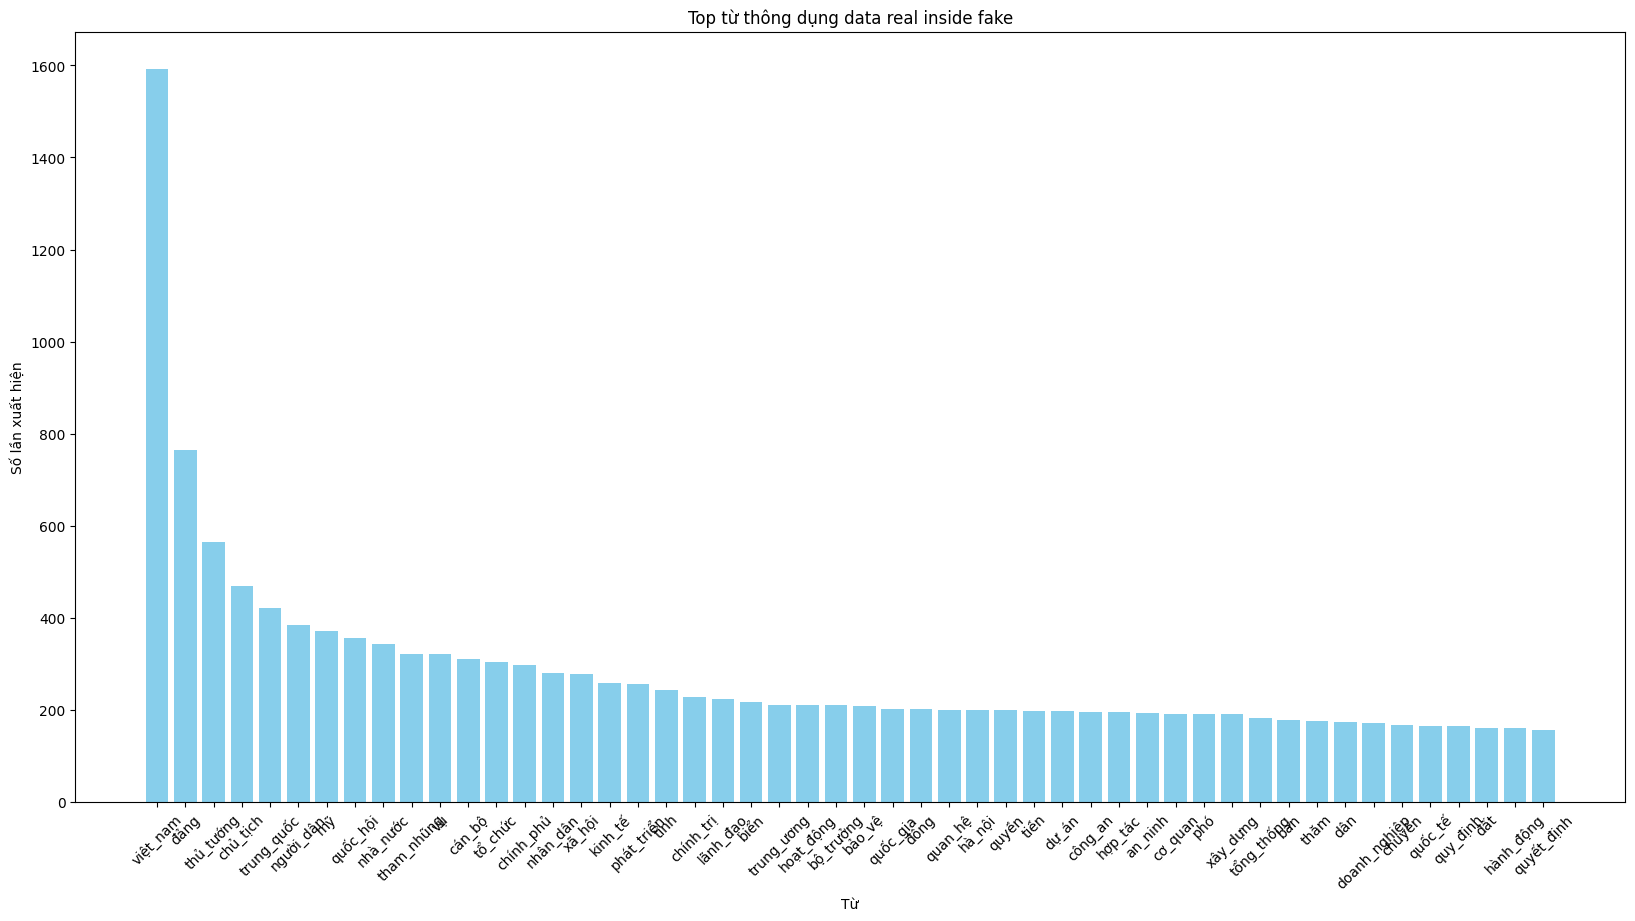

In [86]:
word_counts_real_inside_fake = Counter(' '.join(list(data_real_inside_fake['Content'])).split(' '))

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_real_inside_fake.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng data real inside fake')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

In [87]:
top_words

[('việt_nam', 1593),
 ('đảng', 764),
 ('thủ_tướng', 564),
 ('chủ_tịch', 470),
 ('trung_quốc', 422),
 ('người_dân', 384),
 ('mỹ', 371),
 ('quốc_hội', 357),
 ('nhà_nước', 343),
 ('tham_nhũng', 322),
 ('vụ', 321),
 ('cán_bộ', 310),
 ('tổ_chức', 304),
 ('chính_phủ', 298),
 ('nhân_dân', 281),
 ('xã_hội', 277),
 ('kinh_tế', 259),
 ('phát_triển', 256),
 ('tỉnh', 243),
 ('chính_trị', 228),
 ('lãnh_đạo', 224),
 ('biển', 217),
 ('trung_ương', 211),
 ('hoạt_động', 210),
 ('bộ_trưởng', 210),
 ('bảo_vệ', 208),
 ('quốc_gia', 203),
 ('đông', 202),
 ('quan_hệ', 200),
 ('hà_nội', 200),
 ('quyền', 200),
 ('tiền', 198),
 ('dự_án', 197),
 ('công_an', 195),
 ('hợp_tác', 195),
 ('an_ninh', 193),
 ('cơ_quan', 192),
 ('phó', 191),
 ('xây_dựng', 191),
 ('tổng_thống', 183),
 ('ban', 178),
 ('thăm', 175),
 ('dân', 173),
 ('doanh_nghiệp', 172),
 ('chuyến', 167),
 ('quốc_tế', 164),
 ('quy_định', 164),
 ('đất', 161),
 ('hành_động', 160),
 ('quyết_định', 156)]

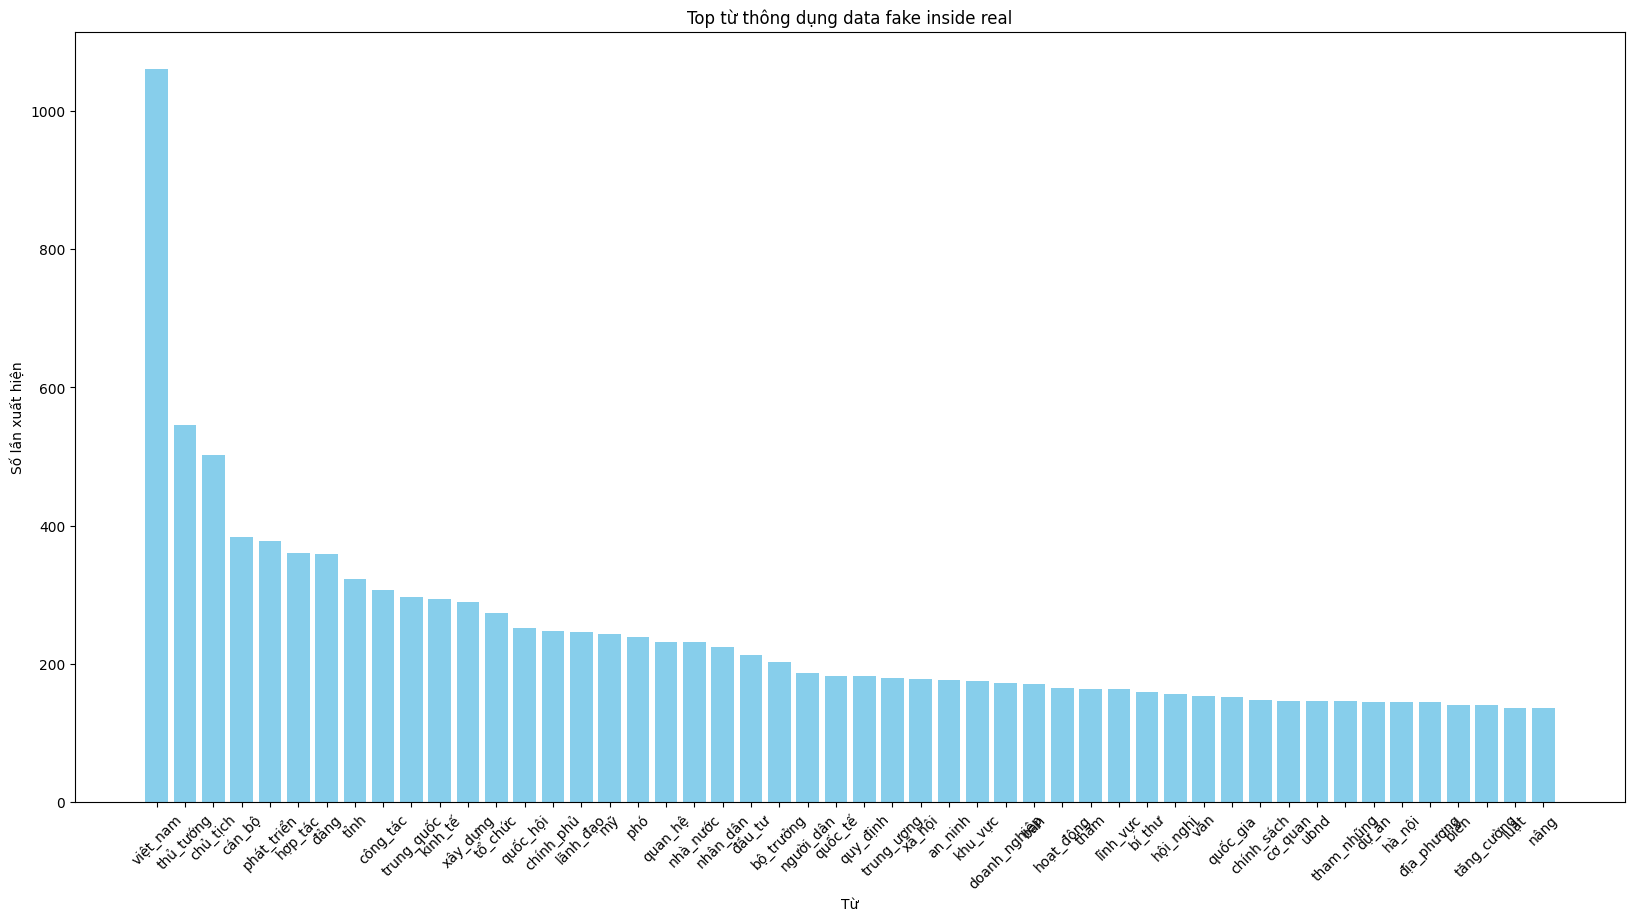

In [88]:
word_counts_fake_inside_real = Counter(' '.join(list(data_fake_inside_real['Content'])).split(' '))

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_fake_inside_real.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng data fake inside real')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

In [89]:
top_words

[('việt_nam', 1061),
 ('thủ_tướng', 545),
 ('chủ_tịch', 502),
 ('cán_bộ', 384),
 ('phát_triển', 377),
 ('hợp_tác', 360),
 ('đảng', 359),
 ('tỉnh', 322),
 ('công_tác', 306),
 ('trung_quốc', 297),
 ('kinh_tế', 293),
 ('xây_dựng', 289),
 ('tổ_chức', 274),
 ('quốc_hội', 252),
 ('chính_phủ', 248),
 ('lãnh_đạo', 246),
 ('mỹ', 243),
 ('phó', 239),
 ('quan_hệ', 232),
 ('nhà_nước', 232),
 ('nhân_dân', 224),
 ('đầu_tư', 213),
 ('bộ_trưởng', 202),
 ('người_dân', 187),
 ('quốc_tế', 182),
 ('quy_định', 182),
 ('trung_ương', 180),
 ('xã_hội', 178),
 ('an_ninh', 176),
 ('khu_vực', 175),
 ('doanh_nghiệp', 172),
 ('ban', 170),
 ('hoạt_động', 165),
 ('thăm', 164),
 ('lĩnh_vực', 163),
 ('bí_thư', 159),
 ('hội_nghị', 156),
 ('văn', 154),
 ('quốc_gia', 152),
 ('chính_sách', 148),
 ('cơ_quan', 146),
 ('ubnd', 146),
 ('tham_nhũng', 146),
 ('dự_án', 145),
 ('hà_nội', 145),
 ('địa_phương', 145),
 ('biển', 140),
 ('tăng_cường', 140),
 ('luật', 136),
 ('nâng', 136)]

In [90]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

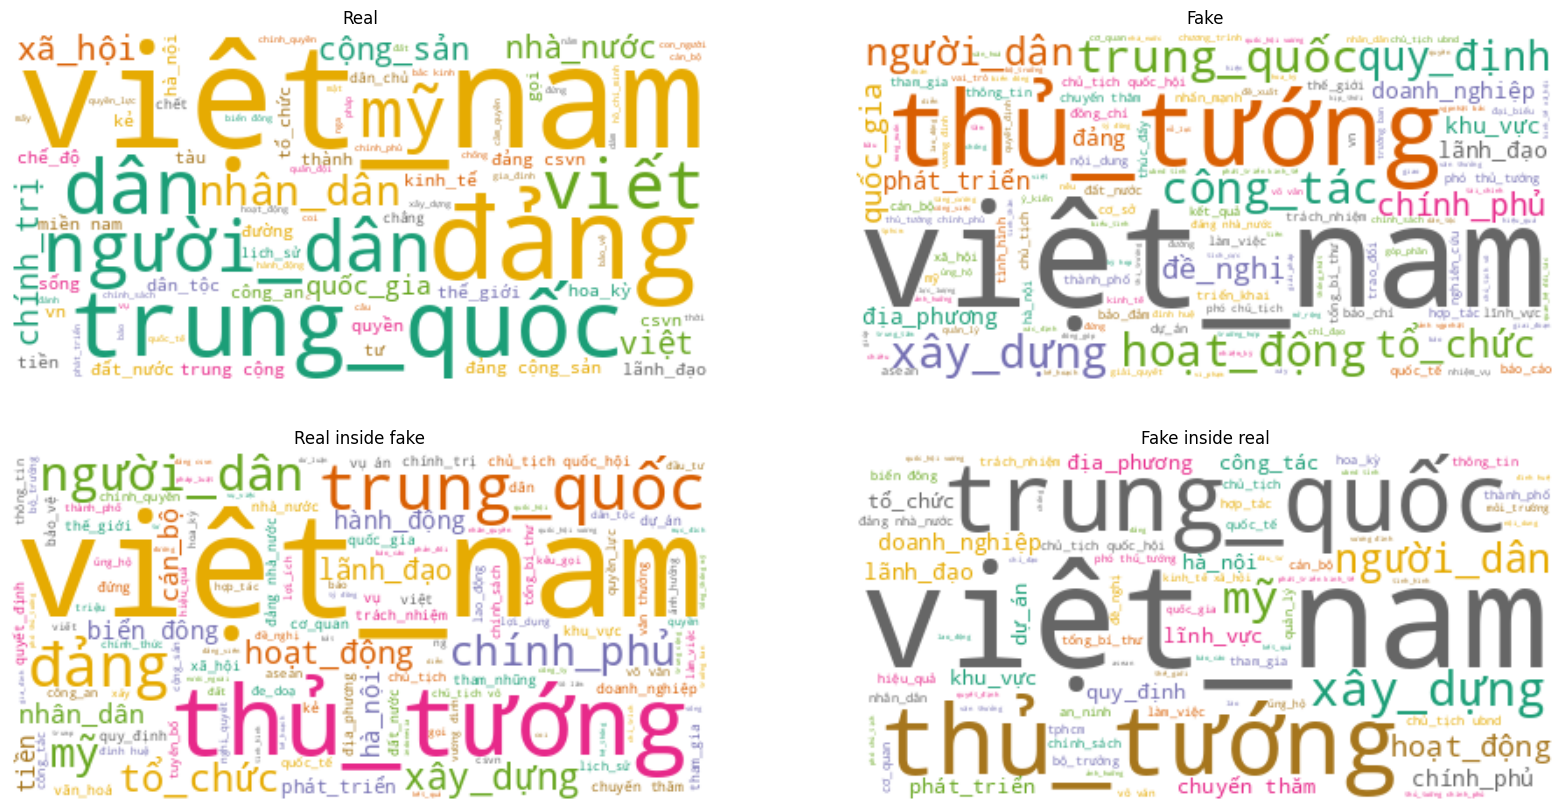

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
data = [' '.join(list(data_fake['Content'])).split(' '),
        ' '.join(list(data_real['Content'])).split(' '),
        ' '.join(list(data_real_inside_fake['Content'])).split(' '),
        ' '.join(list(data_fake_inside_real['Content'])).split(' ')]
title = ['Real', 'Fake', 'Real inside fake', 'Fake inside real']
for i in range(len(data)):
    wc.generate(' '.join(data[i]))
    plt.subplot(2, 2, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title[i])

plt.show()